Importing necessary libraries ....

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz, simps #Importing trapz, and simps module from scipy for numerical integration

Individual PMF data is saved in .xvg file, while diffusion data is saved in .txt file like in this case - Free energy of DEP is in 1-DEP.xvg, and its diffusion is in DEP_dif.txt. Here, we have imported these data in a panda dataframe which simplifies our work.

In [188]:
pmf_dep = pd.read_csv('1-DEP.xvg', header = None, delim_whitespace=True)

In [92]:
# Checking the few data from pmf_dep
pmf_dep.head()

,0,1,2
0,0.005003,-18.37016,1.569825
1,0.015008,-18.34362,1.569539
2,0.025013,-18.35806,1.569685
3,0.035018,-18.36785,1.569009
4,0.045023,-18.36276,1.570050


In [93]:
# Similarly, looking at few last lines of the data
pmf_dep.tail()

,0,1,2
416,4.167127,-0.355550,0.007728
417,4.177132,0.596985,0.004727
418,4.187137,0.783231,0.003857
419,4.197143,0.024860,0.004234
420,4.207148,-19.103220,0.777640


In [189]:
# Extrapolating for the data at 0
df = pd.DataFrame({0: [0.000000], 1: -18.37016, 2:1.569825})
df = df.append(pmf_dep)
df = df.reset_index(drop=True)

In [190]:
# Just making a copy to have same name as original
pmf_dep = df.copy(deep=True)

In [191]:
pmf_dep.head()

,0,1,2
0,0.000000,-18.37016,1.569825
1,0.005003,-18.37016,1.569825
2,0.015008,-18.34362,1.569539
3,0.025013,-18.35806,1.569685
4,0.035018,-18.36785,1.569009


In [192]:
# We don't want the values of z distance above 4, so
pmf_dep = pmf_dep[pmf_dep[0] <= 4.000000]

In [193]:
pmf_dep.tail()

,0,1,2
396,3.957020,-0.015401,0.010041
397,3.967025,-0.017755,0.006894
398,3.977030,-0.073649,0.014431
399,3.987035,-0.025883,0.006661
400,3.997040,0.000000,0.000000


In [194]:
# Just extrapolating to have the same value in z = 4 nm as in z = 3.997040
pmf_dep = pmf_dep.append({0: 4.000000, 1: 0.000000, 2: 0.000000}, ignore_index = True)

In [100]:
pmf_dep

,0,1,2
0,0.000000,-18.370160,1.569825
1,0.005003,-18.370160,1.569825
2,0.015008,-18.343620,1.569539
3,0.025013,-18.358060,1.569685
4,0.035018,-18.367850,1.569009
...,...,...,...
397,3.967025,-0.017755,0.006894
398,3.977030,-0.073649,0.014431
399,3.987035,-0.025883,0.006661
400,3.997040,0.000000,0.000000


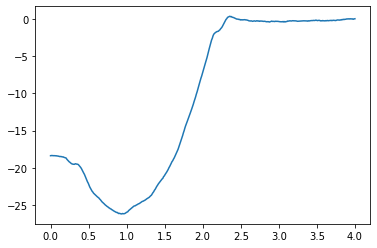

In [195]:
# Now, check a rough plot for free energy
plt.plot(pmf_dep[0], pmf_dep[1])

Now adding a $e^\frac{\Delta G}{RT}$ component in the last column of our PMF data. Here, $\Delta G$ is obtained from the second column df[1] and RT is 2.478 KJ/mol at 298K.

In [196]:
pmf_dep[3] = np.exp(pmf_dep[1]/2.478)

In [197]:
pmf_dep.head()

,0,1,2,3
0,0.000000,-18.37016,1.569825,0.000603
1,0.005003,-18.37016,1.569825,0.000603
2,0.015008,-18.34362,1.569539,0.000610
3,0.025013,-18.35806,1.569685,0.000606
4,0.035018,-18.36785,1.569009,0.000604


In [104]:
# Just checking some values in the last column if it makes sense
np.exp(-18.37016/2.478)

0.0006031762899028857

Now, importing the diffusion coefficient data for DEP........

In [232]:
diff_dep = pd.read_csv('DEP_dif.txt', header = None, delim_whitespace=True)

In [219]:
diff_dep.head()

,0,1
0,0.0,2.100594e-06
1,0.1,2.168585e-06
2,0.2,1.663174e-07
3,0.3,1.112835e-07
4,0.4,2.204095e-07


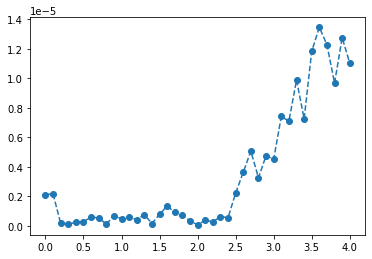

In [220]:
# Let's plot the data for diffusion coefficent of DEP
plt.plot(diff_dep[0], diff_dep[1], '--o')

Here, the linear interpolation is done for our diffusion coefficient so that we can obtain the missing values at the position specified by the PMF data. The function takes these values **np.interp(The z-coordinates at which to evaluate the interpolated values, The z-coordinates of the data points, The function values of these data points)**

In [233]:
diffusion_interpl = np.interp(pmf_dep[0], diff_dep[0], diff_dep[1])

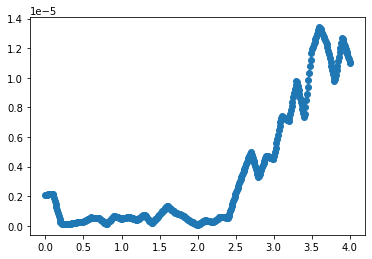

In [234]:
## Let's plot these interpolated values against the z - data points given by pmf_dep[0]
plt.plot(pmf_dep[0], diffusion_interpl, '--o')

The interpolation does makes sense as the two graphs looks like a spitting mirror images of one another. Now, let's make another dataframe with these interpolation data for diffusion coefficient.

In [235]:
diff_dep = pd.DataFrame({0: pmf_dep[0], 1 : diffusion_interpl})

In [236]:
diff_dep.head()

,0,1
0,0.000000,0.000002
1,0.005003,0.000002
2,0.015008,0.000002
3,0.025013,0.000002
4,0.035018,0.000002


In [112]:
diff_dep.tail()

,0,1
397,3.967025,0.000012
398,3.977030,0.000011
399,3.987035,0.000011
400,3.997040,0.000011
401,4.000000,0.000011


#### My first approach for the numerical integration will be to convert the distance in z which are in nm into cm for both pmf as well as diffusion coefficient. 

In [198]:
# For pmf_dep it will be ---
pmf_dep[0] = pmf_dep[0] * 1 * 10 ** -7
pmf_dep.head()
# Here, the only columns we need to worry about is at the index 0 and 3 which are the values for z-distance in cm,
# exp(Delta G/RT)

,0,1,2,3
0,0.000000e+00,-18.37016,1.569825,0.000603
1,5.003035e-10,-18.37016,1.569825,0.000603
2,1.500814e-09,-18.34362,1.569539,0.000610
3,2.501325e-09,-18.35806,1.569685,0.000606
4,3.501835e-09,-18.36785,1.569009,0.000604


In [209]:
# Similarly, for diffusion, it will be ....
diff_dep[0] = diff_dep[0] * 1 * 10 ** -7
diff_dep.head()
# Here, the two columns are the z-distance in cm, and Diffusion coefficient in cm^2/2

,0,1
0,0.000000e+00,0.000002
1,5.003035e-10,0.000002
2,1.500814e-09,0.000002
3,2.501325e-09,0.000002
4,3.501835e-09,0.000002


In [115]:
# Now, we can perform numerical integration with either composite trapezoidal rule, or the simpson's rule

$$\int_{0}^{4 \times 10 ^{-7}} \frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)} dz$$

In [116]:
#trapz(values of the function to integrate, sample points(z) corresponding to the function values, optional (dz)
#- spacing between the sample points(z))

In [117]:
integrand = pmf_dep[3]/diff_dep[1]

In [145]:
integrand

0        287.145625
1        286.681380
2        288.834451
3        286.233757
4        284.192198
           ...     
397    85623.435161
398    84981.312561
399    87967.260236
400    90278.901252
401    90697.888508
Length: 402, dtype: float64

In [146]:
integrand.max()

2007424.7106339969

In [147]:
integrand.min()

40.43944266939811

Let's check some values of the integrand. For the first value at z = 0,

In [167]:
pmf_dep[1].to_numpy()[0]

-18.37016

In [165]:
diff_dep[1].to_numpy()[0]

2.1005937e-06

In [168]:
# Delta G = -18.37016, RT = 2.478, D(z) = 2.1005937e-06 cm^2/s
np.exp(-18.37016/2.478)/2.1005937e-06

287.14562454552055

In [170]:
integrand[0] # We get same values both manually and with dataframe

287.14562454552055

In [171]:
# Now, let's check at z = 4 nm or 4 e -7 cm
pmf_dep[1].to_numpy()[-1] # Delta G

0.0

In [173]:
diff_dep[1].to_numpy()[-1] # Diffusion coefficient

1.1025615e-05

In [174]:
# Delta G = 0, RT = 2.478, D(z) = 1.1025615e-05 cm^2/s
np.exp(0/2.478)/1.1025615e-05

90697.8885078066

In [178]:
# Same as we expected:
integrand[401]

90697.8885078066

In [131]:
trapz(integrand, pmf_dep[0])

0.08579412974187776

In [132]:
# The permeability will be 1/integral
1/trapz(integrand, pmf_dep[0])

11.655809121307291

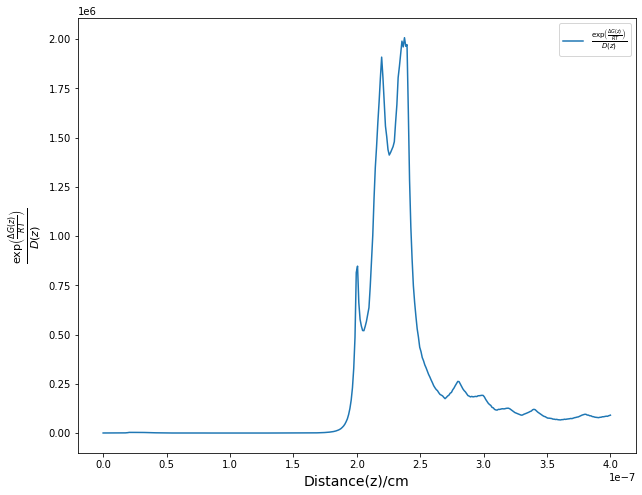

In [136]:
# Let's look at the plot of the integrand
plt.figure(figsize = (10,8))
plt.plot(pmf_dep[0], integrand, label = r'$\frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)}$')
plt.xlabel('Distance(z)/cm', fontsize = 14)
plt.ylabel(r'$\frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)}$', fontsize = 16)
plt.legend()

### Using Simpson's method:

In [179]:
simps(integrand, pmf_dep[0])

0.08579399765062952

In [180]:
# permeability will be
1/simps(integrand, pmf_dep[0])

11.655827066972703

#### My another approach for the numerical integration will be to convert diffusion coefficient (cm^2/s) into nm^2/s, integrate it over the distance in nm, and finally convert into cm/s

In [181]:
# Our both pmf and diffusion data
pmf_dep.head()

,0,1,2,3
0,0.000000e+00,-18.37016,1.569825,0.000603
1,5.003035e-10,-18.37016,1.569825,0.000603
2,1.500814e-09,-18.34362,1.569539,0.000610
3,2.501325e-09,-18.35806,1.569685,0.000606
4,3.501835e-09,-18.36785,1.569009,0.000604


In [182]:
diff_dep.head()

,0,1
0,0.000000e+00,0.000002
1,5.003035e-10,0.000002
2,1.500814e-09,0.000002
3,2.501325e-09,0.000002
4,3.501835e-09,0.000002


In [183]:
# Let's convert the distance in both which are in cm back into nm, and also add another column in diffusion data 
# so that the coefficients are now converted into nm^2/s

In [199]:
pmf_dep[0] = pmf_dep[0] * 1 * 10 ** 7
diff_dep[0] = diff_dep[0] * 1 * 10 ** 7

In [210]:
diff_dep[0] = diff_dep[0] * 1 * 10 ** 7

In [211]:
# Let's check
pmf_dep.head()

,0,1,2,3
0,0.000000,-18.37016,1.569825,0.000603
1,0.005003,-18.37016,1.569825,0.000603
2,0.015008,-18.34362,1.569539,0.000610
3,0.025013,-18.35806,1.569685,0.000606
4,0.035018,-18.36785,1.569009,0.000604


In [212]:
diff_dep.head()

,0,1
0,0.000000,0.000002
1,0.005003,0.000002
2,0.015008,0.000002
3,0.025013,0.000002
4,0.035018,0.000002


In [214]:
diff_dep.tail()

,0,1
397,3.967025,0.000012
398,3.977030,0.000011
399,3.987035,0.000011
400,3.997040,0.000011
401,4.000000,0.000011


In [216]:
pmf_dep.tail()

,0,1,2,3
397,3.967025,-0.017755,0.006894,0.992860
398,3.977030,-0.073649,0.014431,0.970716
399,3.987035,-0.025883,0.006661,0.989609
400,3.997040,0.000000,0.000000,1.000000
401,4.000000,0.000000,0.000000,1.000000


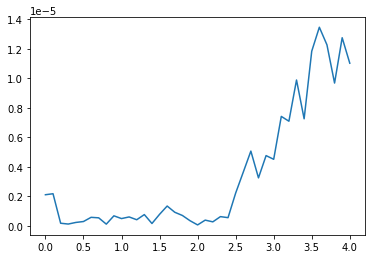

In [223]:
# Plotting both these two
plt.plot(diff_dep[0], diff_dep[1])

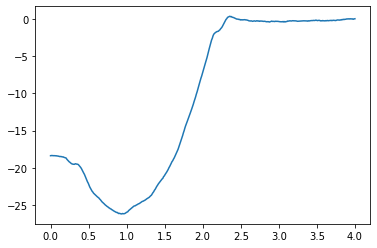

In [224]:
plt.plot(pmf_dep[0], pmf_dep[1])

In [237]:
# Converting diffusion coefficient into nm^2/s and adding it into the last column
diff_dep[2] = diff_dep[1] * 1 * 10 ** 14

In [238]:
diff_dep.head()

,0,1,2
0,0.000000,0.000002,2.100594e+08
1,0.005003,0.000002,2.103995e+08
2,0.015008,0.000002,2.110798e+08
3,0.025013,0.000002,2.117601e+08
4,0.035018,0.000002,2.124403e+08


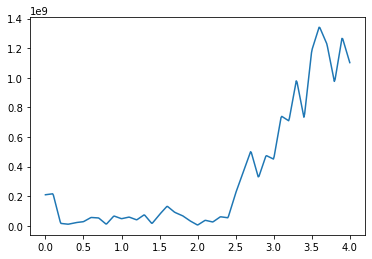

In [239]:
# Again, plotting to check
plt.plot(diff_dep[0], diff_dep[2])

In [240]:
pmf_dep.head()

,0,1,2,3
0,0.000000,-18.37016,1.569825,0.000603
1,0.005003,-18.37016,1.569825,0.000603
2,0.015008,-18.34362,1.569539,0.000610
3,0.025013,-18.35806,1.569685,0.000606
4,0.035018,-18.36785,1.569009,0.000604


In [241]:
integrand = pmf_dep[3]/diff_dep[2]

In [242]:
integrand

0      2.871456e-12
1      2.866814e-12
2      2.888345e-12
3      2.862338e-12
4      2.841922e-12
           ...     
397    8.562344e-10
398    8.498131e-10
399    8.796726e-10
400    9.027890e-10
401    9.069789e-10
Length: 402, dtype: float64

In [243]:
trapz(integrand, pmf_dep[0])

8.579412974187779e-09

In [244]:
1/trapz(integrand, pmf_dep[0]) # This is now in nm/s

116558091.21307288

In [245]:
# Converting into cm/s
1/trapz(integrand, pmf_dep[0]) * 1 * 10 ** -7

11.655809121307287

In [246]:
# So, both the methods I have mentioned in here fetches us the same result